<h1 align='center'>Unsupervised Learning - Clustering with Agglomerative and K-Means </h1>

## Objective
This project requires to develop a customer segmentation to define marketing strategy. The sample [Dataset](https://drive.google.com/file/d/1P_jFdkc6FEai2W3RwcF5z5UIA60Our4Q/view?usp=sharing) summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :

* **CUST_ID:** Identification of Credit Card holder (Categorical)
* **BALANCE:** Balance amount left in their account to make purchases
* **BALANCE_FREQUENCY :** How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated) 
* **PURCHASES:** Amount of purchases made from account 
* **ONEOFF_PURCHASES:** Maximum purchase amount done in one-go
* **INSTALLMENTS_PURCHASES:** Amount of purchase done in installment
* **CASH_ADVANCE:** Cash in advance given by the user
* **PURCHASES_FREQUENCY:** How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* **ONEOFFPURCHASESFREQUENCY:** How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* **PURCHASESINSTALLMENTSFREQUENCY:** How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* **CASHADVANCEFREQUENCY:** How frequently the cash in advance being paid 
* **CASHADVANCETRX:** Number of Transactions made with "Cash in Advanced" 
* **PURCHASES_TRX:** Number of purchase transactions made
* **CREDIT_LIMIT:** Limit of Credit Card for user 
* **PAYMENTS:** Amount of Payment done by user
* **MINIMUM_PAYMENTS:** Minimum amount of payments made by user 
* **PRCFULLPAYMENT:** Percent of full payment paid by user
* **TENURE:** Tenure of credit card service for user

## Load the dataset

In [1]:
import pandas as pd

df = pd.read_csv('CC GENERAL.csv')

print('The shape of the dataset is :', df.shape)
df.head()

The shape of the dataset is : (8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [2]:
# nulls
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [3]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## Data preparation
Nulls : replacing with mean values

In [4]:
df = df.fillna(df.mean())

Data standardization :

In [5]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(df.drop('CUST_ID', axis = 1))

## Clustering
### Part1 : 
   * **Use hierarchical clustering to identify the inherent groupings within your data.**
   * **Plot the clusters.**
   * **Plot the dendrogram.**
   
To perform hierarchical clustering (Agglomerative in our case), I'll plot the dendrogram first and then I'll chose the best number of clusters.

First, I'll compute the distance matrix :

In [6]:
from scipy.spatial import distance_matrix

dist_mat = distance_matrix(X, X)
dist_mat

array([[0.        , 4.39402134, 4.61717026, ..., 5.07641058, 4.67705949,
        5.60114409],
       [4.39402134, 0.        , 5.63124567, ..., 6.77604792, 6.12304225,
        6.84664128],
       [4.61717026, 5.63124567, 0.        , ..., 6.37570793, 6.73457012,
        5.5917873 ],
       ...,
       [5.07641058, 6.77604792, 6.37570793, ..., 0.        , 2.82747083,
        3.64451465],
       [4.67705949, 6.12304225, 6.73457012, ..., 2.82747083, 0.        ,
        3.36054369],
       [5.60114409, 6.84664128, 5.5917873 , ..., 3.64451465, 3.36054369,
        0.        ]])

Now plotting the dendrogram :

```python
from scipy.cluster import hierarchy 

# using the linkage class from hierarchy and save the result to a variable called Z
Z = hierarchy.linkage(dist_mat, 'complete')
# plot the dendrogram
plt.figure(figsize=(10, 25))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('distance')

dendrogram(Z, labels = df['CUST_ID'], orientation = "left")
```

Because it's computationaly costing to compute and plot a dendrogram for almost 9000 observations, we are not able to see our graph and select what it could be the best number of clusters.

Now we'll perform clustering :
* n_clusters = 2
* linkage = 'complete'
* affinity = 'precomputed', because we have our distance matrix already computed

In [7]:
from sklearn.cluster import AgglomerativeClustering

agglom = AgglomerativeClustering(n_clusters = 2, linkage = 'complete', affinity='precomputed')
agglom.fit(dist_mat)

df['CLUSTER_AGG'] = agglom.labels_
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER_AGG
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [10]:
df.CLUSTER_AGG.value_counts()

0    8927
1      23
Name: CLUSTER_AGG, dtype: int64

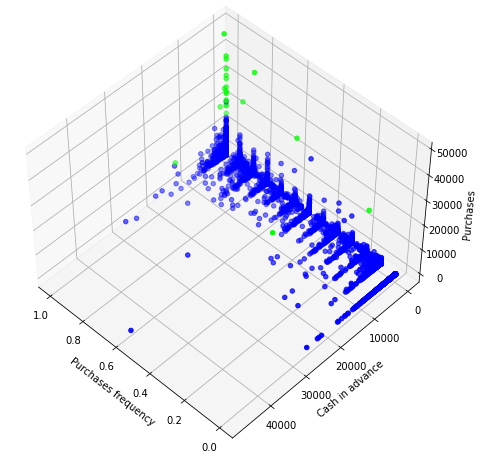

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure(1, figsize = (8, 6))
ax = Axes3D(fig, rect = [0, 0, .95, 1], elev = 48, azim = 134, auto_add_to_figure = False)
fig.add_axes(ax)

ax.set_xlabel('Purchases frequency')
ax.set_ylabel('Cash in advance')
ax.set_zlabel('Purchases')

ax.scatter(df['PURCHASES_FREQUENCY'], df['CASH_ADVANCE'], df['PURCHASES'],
           c = df['CLUSTER_AGG'].astype(np.float), cmap = 'brg')
plt.show()

> We observe that the Agglomerative algorithm has spearated our dataset into one huge cluster and a little one. and we can see that cluster 1 members generaly don't pay cash in advance and tend to made lot of purchases in terms of frequency and amount.

### Part2 : 
   * **Use k-means clustering**
   * **Try different k values and select the best one.** 
   * **Plot the clusters.**
 
Let's begin by searching for the optimal number of clusters :

**1) Elbow method :**

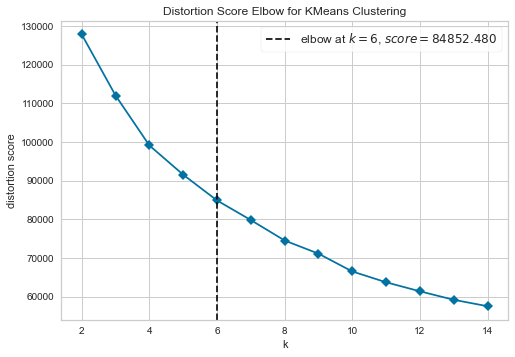

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15), timings=False)
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

The elbow method has indicated that the optimal k is 6 with a score of 84853. Because this choice is not obvious in the plot by the point (it should indicates the maximum decrease in distortion score) I'll use the `SilhouetteVisualizer`.

**2) Silhouette score :**

Silhouette analysis can be used to evaluate the density and separation between clusters :

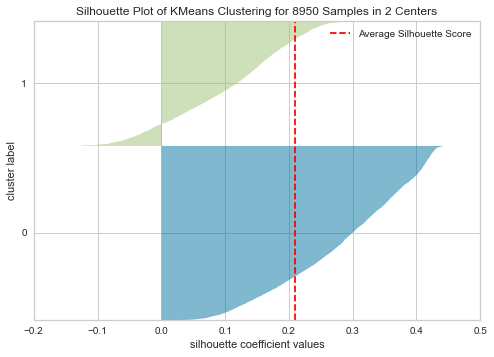

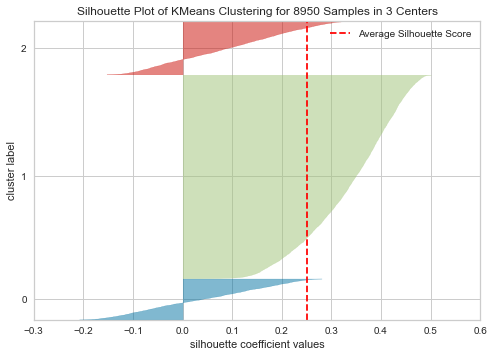

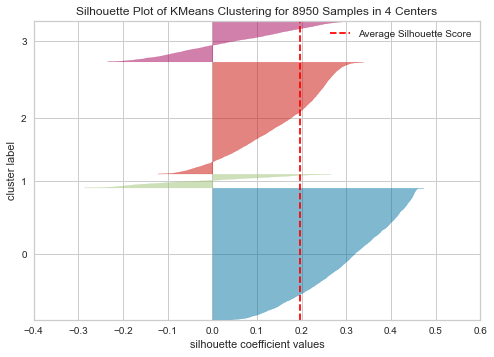

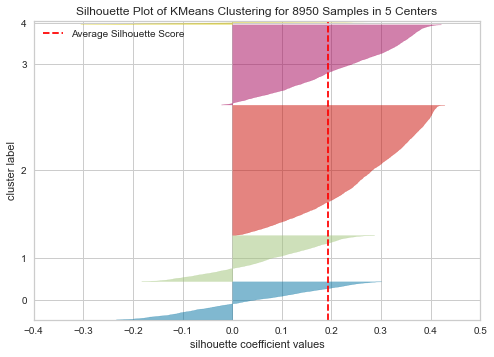

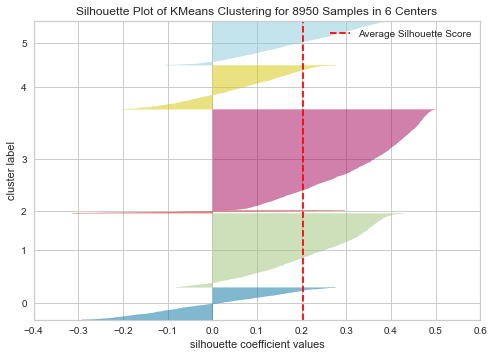

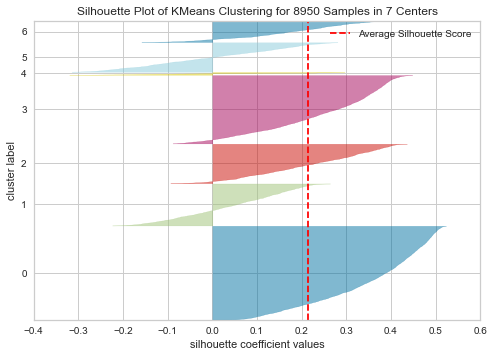

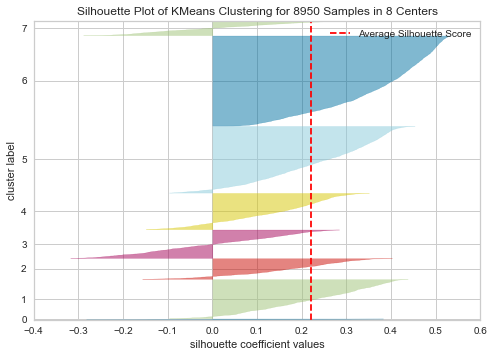

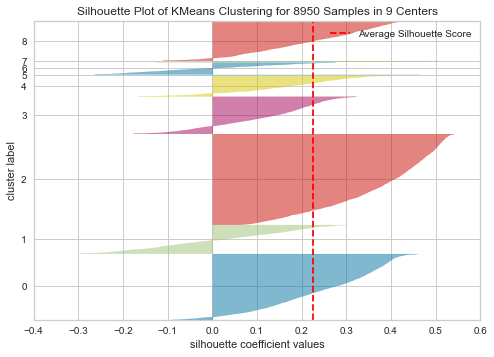

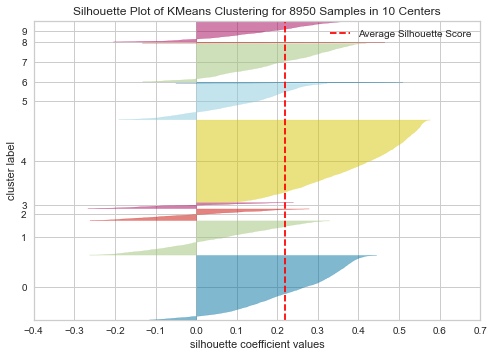

In [13]:
from yellowbrick.cluster import SilhouetteVisualizer

for k in range(2, 11) :
    model = KMeans(k, random_state=42)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
    visualizer.fit(X)        # Fit the data to the visualizer
    visualizer.show()        # Finalize and render the figure

We can observe that the choice of k = 6 is not very good in our case. The existance of a tiny cluster and the high negative scores for some individuals in clusters 0 and 2 confirms that.

We could chose to work with k = 3 as it has the highest average silhouette score.

**3)Intercluster Distance Maps :**

>Intercluster distance maps display an embedding of the cluster centers in 2 dimensions with the distance to other centers preserved. E.g. the closer to centers are in the visualization, the closer they are in the original feature space. The clusters are sized according to a scoring metric. By default, they are sized by membership, e.g. the number of instances that belong to each center. This gives a sense of the relative importance of clusters. Note however, that because two clusters overlap in the 2D space, it does not imply that they overlap in the original feature space.

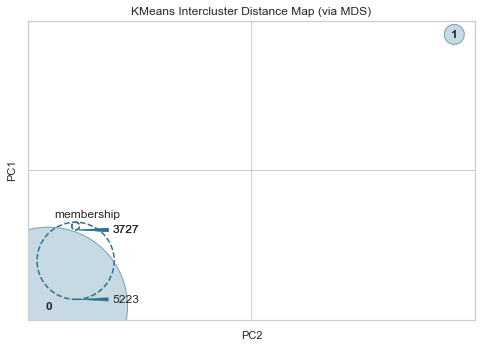

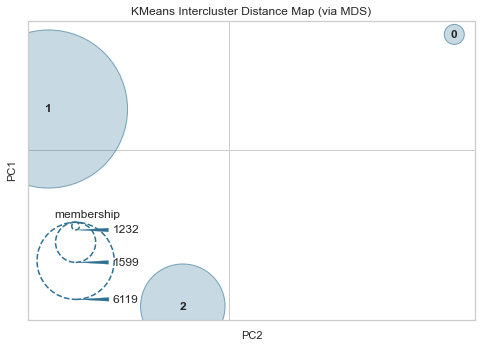

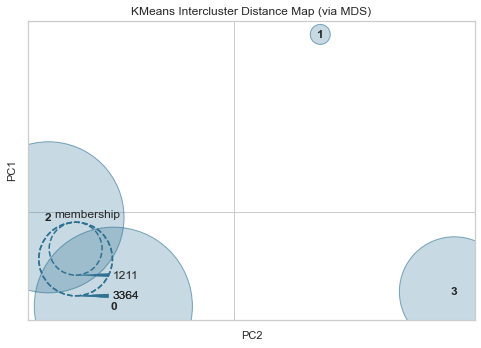

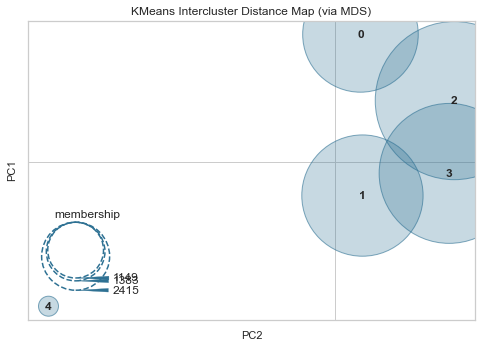

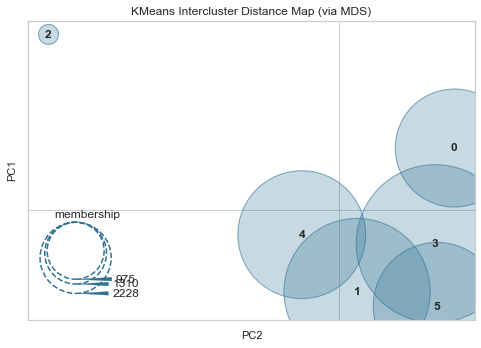

In [14]:
from yellowbrick.cluster import InterclusterDistance

for k in range(2, 7) :
    model = KMeans(k, random_state=42)
    visualizer = InterclusterDistance(model, colors='yellowbrick')
    visualizer.fit(X)        # Fit the data to the visualizer
    visualizer.show()        # Finalize and render the figure

We observe that with 3 clusters,the intracluster distance is very high, so we could continue our clustering exercise with k = 3

**K-Means :**

In [15]:
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means.fit(X)

df['CLUSTER_KM'] = k_means.labels_
df.sample(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER_AGG,CLUSTER_KM
1822,C11882,1628.591333,1.000000,361.00,0.00,361.00,291.278909,0.833333,0.000000,0.750000,0.166667,2,20,1800.0,1018.197785,684.453198,0.000000,12,0,1
6984,C17175,51.651430,0.727273,398.98,0.00,398.98,0.000000,0.500000,0.000000,0.333333,0.000000,0,6,2500.0,452.347581,264.697366,0.571429,12,0,1
8308,C18529,2066.764509,1.000000,421.12,421.12,0.00,2099.570770,0.083333,0.083333,0.000000,0.333333,26,1,2500.0,701.557906,1397.322018,0.000000,12,0,2
1032,C11067,1133.090254,1.000000,85.92,0.00,85.92,551.078807,0.583333,0.000000,0.583333,1.000000,13,7,1200.0,0.000000,864.206542,0.000000,12,0,2
2428,C12502,59.263479,0.181818,300.68,0.00,300.68,0.000000,0.090909,0.000000,0.090909,0.000000,0,1,5000.0,3142.651675,80.613743,0.000000,11,0,1
2444,C12518,96.155647,1.000000,1070.73,432.80,637.93,0.000000,1.000000,1.000000,0.750000,0.000000,0,27,10000.0,1229.025203,192.197394,1.000000,12,0,0
4136,C14252,58.647973,0.909091,528.65,108.32,420.33,0.000000,0.666667,0.083333,0.416667,0.000000,0,12,2000.0,539.967700,115.495581,0.571429,12,0,1
1536,C11588,1787.535327,1.000000,0.00,0.00,0.00,5566.777503,0.000000,0.000000,0.000000,0.250000,8,0,7500.0,4592.708912,461.680587,0.000000,12,0,2
5707,C15866,82.476563,1.000000,637.44,0.00,637.44,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,4000.0,623.916338,179.604687,0.750000,12,0,1
2222,C12292,684.658511,1.000000,184.68,0.00,184.68,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2900.0,2837.204108,350.274370,0.400000,12,0,1


Plot the results :

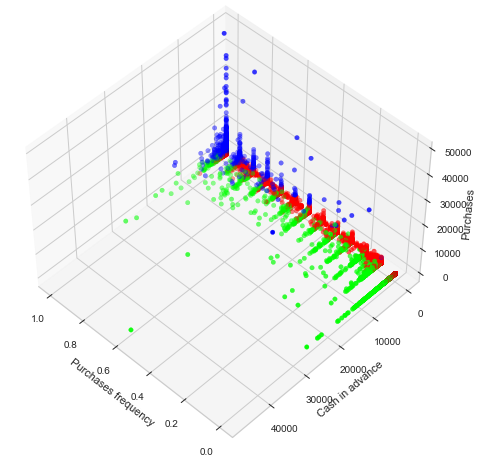

In [16]:
fig = plt.figure(1, figsize = (8, 6))
ax = Axes3D(fig, rect = [0, 0, .95, 1], elev = 48, azim = 134, auto_add_to_figure = False)
fig.add_axes(ax)

ax.set_xlabel('Purchases frequency')
ax.set_ylabel('Cash in advance')
ax.set_zlabel('Purchases')

ax.scatter(df['PURCHASES_FREQUENCY'], df['CASH_ADVANCE'], df['PURCHASES'],
           c = df['CLUSTER_KM'].astype(np.float), cmap = 'brg')
plt.show()

Runing KMeans algorithm with 3 clusters results in :
* Members who don't pay cash in advance with low amount of purchases (dots in red).
* Members who do pay various amount of cash in advance and they have also low purchasing habits (green dots).
* Members with haigh purchasing habits (frequency and income), but they tend to not pay chash in advance in general.

### Part 3 : comparing the results

Before comparing and concluding, let's mention that I've tried to perform agglomerative clustering with 3 clusters but it results in a third cluster with only one item. So let's compare their performance with the previous results.

To evaluate the performance of our algorithms I'll use :
* Silhouette coefficient : 
    * The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. 
    * Scores around zero indicate overlapping clusters.
* Calinski-Harabasz Index : 
    * also known as the Variance Ratio Criterion - can be used to evaluate the model, where a higher score relates to a model with better defined clusters.
    * The index is the ratio of the sum of between-clusters dispersion and of within-cluster dispersion for all clusters (where dispersion is defined as the sum of distances squared)
* Davies-Bouldin Index :
    * a lower Davies-Bouldin index relates to a model with better separation between the clusters.
    * This index signifies the average ‘similarity’ between clusters, where the similarity is a measure that compares the distance between clusters with the size of the clusters themselves.

In [21]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

models = ['Agglomerative (k = 2)', 'K-Means (k = 3)']
columns = ['CLUSTER_AGG', 'CLUSTER_KM']

for model, col in zip(models, columns) :
    print('--'*20)
    print('Model :', model)
    labels = df[col]
    print('\t Silhouette coefficient :', silhouette_score(X, labels, metric='euclidean'))
    print('\t Calinski-Harabasz Index :', calinski_harabasz_score(X, labels))
    print('\t Davies-Bouldin Index :', davies_bouldin_score(X, labels))


----------------------------------------
Model : Agglomerative (k = 2)
	 Silhouette coefficient : 0.7865552204235159
	 Calinski-Harabasz Index : 698.3589948199432
	 Davies-Bouldin Index : 0.5902597808519406
----------------------------------------
Model : K-Means (k = 3)
	 Silhouette coefficient : 0.2505299806322502
	 Calinski-Harabasz Index : 1604.3947142489408
	 Davies-Bouldin Index : 1.59756324899834


---
Evaluating both algorithms shows that segmenting the clients dataset with Agglomerative algorithm and selecting two clusters results in well dense groups in compare to K-Means with k = 3.

The Agglomerative model has a very high Silhouette coefficient (3 times greater than the K-means score). Although the K-means model has a better Calinski-Harbasz index, with such a lower score for the Davies-Bouldin Index for the Hierarchical model indicates that it could be better than the other.

---